*to run this file you will need the pandas and ydata_profiling libraries

# **Data Curation Final Project**

The goal of this project is to develop an application that is able to integrate datasets related to landslides, avalanches, driveable roads and municipalities in the province of Bozen/Bolzano, allowing the user to query a SPARQL server for road segments that are in vulnerable areas and the municipalities that include the most kilometers of vulnerable areas.

### **The Data**

For the project, a total of 4 datasets were chosen. These datasets were provided by the professors administering this class, and belong to different organizations.
<br><br>
The tables and respective organizations are:
- [UrbanPlan-HazardZonePlan-Landslides.csv](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:TerritorialPlans:UrbanPlan-HazardZonePlan-Landslides)
- [UrbanPlan-HazardZonePlan-Avalanches.csv](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:TerritorialPlans:UrbanPlan-HazardZonePlan-Avalanches)
- [Municipalities.csv](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:AdministrativeUnits:Municipalities)

Which all belong to the [Bolzano Province GeoKatalog data](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/home)

and
- [sudagoost_tran_rds_ln_s4_osm_pp_drive.csv](https://edp-portal.eurac.edu/discovery/c389eb97-87c0-4948-8b6d-cfc44a4263b5)

which belongs to [Eurac](https://edp-portal.eurac.edu/discovery/c389eb97-87c0-4948-8b6d-cfc44a4263b5).

# **Data Profiling Part**

## Exploratory Data Analysis

The goal in this EDA phase is to identify what the data is about, what it contains and its structure. It will be analyzed table by table, and then inter-table relationships will be searched for.

Although the Data Wrangler extension for VSCode is being used for easily doing most of these tasks, for the sake of simplicity and to avoid excessive information, pandas will be used to enable easy reproducibility wherever it is needed.

<br>

## Municipalities
[_Municipalities.csv_](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:AdministrativeUnits:Municipalities)


The dataset for municipalities contains a relation of all municipalities in South Tyrol, and is provided by the government of the province itself.

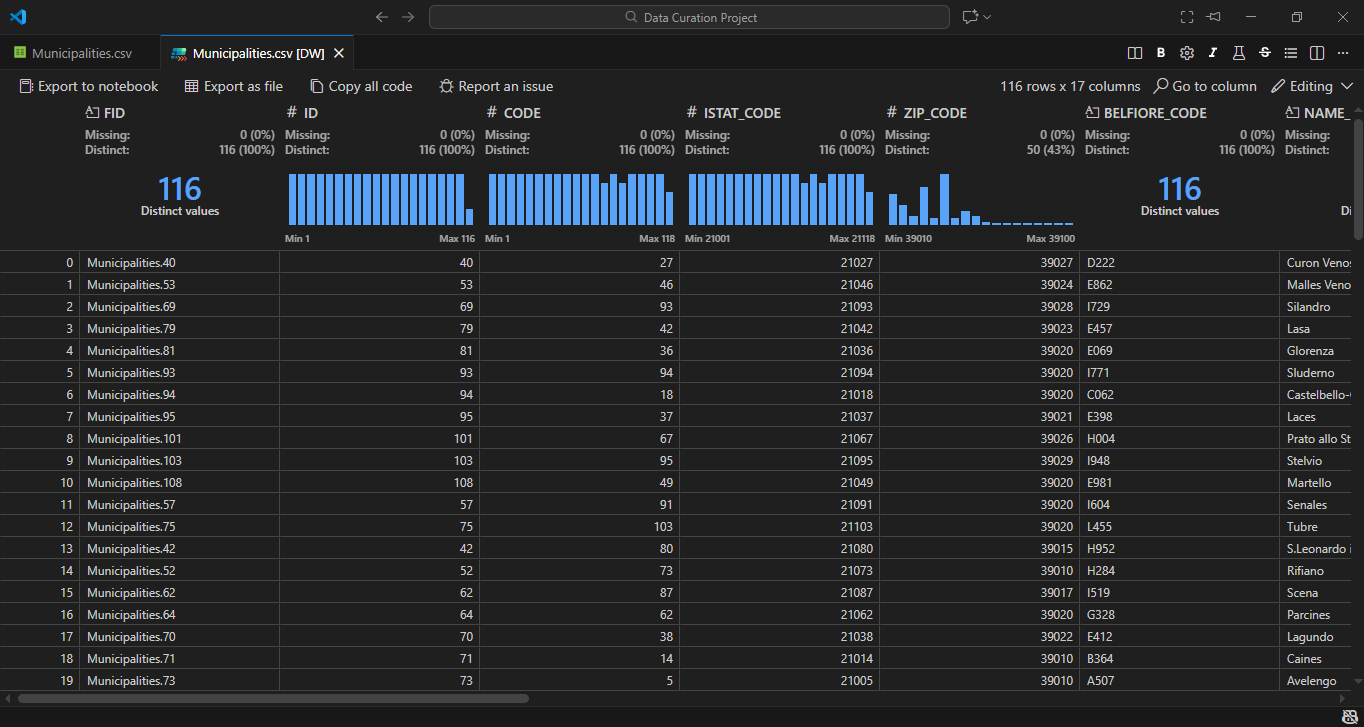

The municipalities.csv file consists of 17 columns with 116 rows in total, not counting the header.

The initial "eyeballing" lets us trivially identify that most columns have unique values (as many of them have 116 values, the same amount of rows). We can also see that each row corresponds to exactly one municipality and contains several columns of information about it (mostly codes for the same municipality in different contexts, such as its Belfiore Code and its German and Italian names).

In [2]:
import os
from pathlib import Path
filepath = Path(os.getcwd()) / 'Data'


import pandas as pd

municipalities = pd.read_csv(filepath / 'Municipalities.csv')
municipalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FID              116 non-null    object 
 1   ID               116 non-null    int64  
 2   CODE             116 non-null    int64  
 3   ISTAT_CODE       116 non-null    int64  
 4   ZIP_CODE         116 non-null    int64  
 5   BELFIORE_CODE    116 non-null    object 
 6   NAME_IT          116 non-null    object 
 7   NAME_DE          116 non-null    object 
 8   NAME_LD          116 non-null    object 
 9   DISTR_CODE       116 non-null    int64  
 10  DISTR_DE         116 non-null    object 
 11  DISTR_IT         116 non-null    object 
 12  AREA             116 non-null    float64
 13  HEALTH_REGION    116 non-null    int64  
 14  HEALTH_DISTRICT  116 non-null    int64  
 15  MAP_LABEL        116 non-null    object 
 16  SHAPE            116 non-null    object 
dtypes: float64(1), i

In [3]:
municipalities

,FID,ID,CODE,ISTAT_CODE,ZIP_CODE,BELFIORE_CODE,NAME_IT,NAME_DE,NAME_LD,DISTR_CODE,DISTR_DE,DISTR_IT,AREA,HEALTH_REGION,HEALTH_DISTRICT,MAP_LABEL,SHAPE
0,Municipalities.40,40,27,21027,39027,D222,Curon Venosta,Graun im Vinschgau,,1,Vinschgau,Val Venosta,2.100640e+08,2,21,Graun im Vinschgau\nCuron Venosta,"POLYGON ((612515.506 5190402.68, 612410.319 51..."
1,Municipalities.53,53,46,21046,39024,E862,Malles Venosta,Mals,,1,Vinschgau,Val Venosta,2.469756e+08,2,21,Mals\nMalles Venosta,"POLYGON ((629328.883 5183657.369, 629196.709 5..."
2,Municipalities.69,69,93,21093,39028,I729,Silandro,Schlanders,,1,Vinschgau,Val Venosta,1.151231e+08,2,22,Schlanders\nSilandro,"POLYGON ((631466.182 5171752.183, 631466.144 5..."
3,Municipalities.79,79,42,21042,39023,E457,Lasa,Laas,,1,Vinschgau,Val Venosta,1.100357e+08,2,22,Laas\nLasa,"POLYGON ((631466.182 5171752.183, 631465.436 5..."
4,Municipalities.81,81,36,21036,39020,E069,Glorenza,Glurns,,1,Vinschgau,Val Venosta,1.297799e+07,2,21,Glurns\nGlorenza,"POLYGON ((617875.636 5170809.166, 617875.802 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Municipalities.37,37,96,21096,39030,L106,Terento,Terenten,,8,Pustertal,Val Pusteria,4.253398e+07,4,42,Terenten\nTerento,"POLYGON ((711023.643 5195840.57, 711024.419 51..."
112,Municipalities.36,36,63,21063,39030,G443,Perca,Percha,,8,Pustertal,Val Pusteria,3.032460e+07,4,42,Percha\nPerca,"POLYGON ((733577.591 5197021.703, 733241.26 51..."
113,Municipalities.34,34,109,21109,39030,L601,Valle di Casies,Gsies,,8,Pustertal,Val Pusteria,1.090181e+08,4,43,Gsies\nValle di Casies,"POLYGON ((748332.91 5197781.932, 748285.499 51..."
114,Municipalities.31,31,71,21071,39030,H189,Rasun Anterselva,Rasen-Antholz,,8,Pustertal,Val Pusteria,1.210081e+08,4,42,Rasen-Antholz\nRasun Anterselva,"POLYGON ((739435.685 5200429.418, 739298.263 5..."


We can observe that while no column has null values, NAME_LD seems to be mostly empty cells.

In [4]:
municipalities.nunique()

FID                116
ID                 116
CODE               116
ISTAT_CODE         116
ZIP_CODE            50
BELFIORE_CODE      116
NAME_IT            116
NAME_DE            116
NAME_LD             10
DISTR_CODE           8
DISTR_DE             8
DISTR_IT             8
AREA               116
HEALTH_REGION        4
HEALTH_DISTRICT     20
MAP_LABEL          116
SHAPE              116
dtype: int64

We can see that there are a few columns that are not unique: NAME_LD, DISTR_CODE, DISTR_DE, DISTR_IT, HEALTH_REGION, HEALTH_DISTR and ZIP_CODE. Those are the only columns that might have interesting non-trivial dependencies.

Intuitively and from domain knowledge, we know that the municipality functionally determines the Ladin name when there is a name in Ladin for it
>MUNICIPALITY_CODE →c NAME_LD where c = (NAME_LD IS NOT NULL)

It is trivial to conclude that in this table every column is functionally determined by the municipality (and each of the columns that have 116 distinct values), although we cannot be really sure whether a municipality only has one zip code or not.

That leaves us with only one interesting possible dependency: is the district code functionally determined by the zip code?

In [32]:
# IMPLEMENTATIONS (making ANY library or tool for FD discovery work was taking way longer than coding this by hand would)

def check_for_fd(dataframe: pd.DataFrame, lsc: str, rsc: str, threshold: float = 1.0):
    if dataframe[lsc].isna().all() or dataframe[rsc].nunique() <= 1:
        return False  # Empty columns cannot determine anything
    
    reduced_df = dataframe.groupby(lsc).filter(lambda x: len(x) > 1)
    
    if len(reduced_df) == 0: return True
    
    return (reduced_df.groupby(lsc)[rsc].nunique() ==  1).mean() >= threshold


def check_all_nontrivial_fd(dataframe: pd.DataFrame, combinations: bool = False, threshold: float = 1.0):
    """
    This will check all functional dependencies which satisfy the following conditions:
    1. The RHS column combination is not a subset of the LHS column combination
    2. There isn't any CC which depends on the LHS CC that also determines the RHS CC
    3. The LHS CC isn't a UCC
    4. The RHS CC isn't homogenous (anything that only has one value would be functionally dependent of anything else)
    """
    # Step 1: Separate unique and non-unique columns
    unique_columns = set()
    non_unique_columns = []
    
    for column in dataframe.columns:
        if dataframe[column].is_unique:
            unique_columns.add(column)
        else:
            non_unique_columns.append(column)
    
    # print(f"Unique columns: {unique_columns}")
    # print(f"Non-unique columns: {non_unique_columns}")
    
    # Step 2: Find all functional dependencies
    functional_dependencies = {}
    
    if not combinations:
        # Check all pairs of non-unique columns
        for i, lhs in enumerate(non_unique_columns):
            functional_dependencies[lhs] = set()
            
            for j, rhs in enumerate(non_unique_columns):
                if i != j:  # Don't check column against itself
                    if check_for_fd(dataframe, lhs, rhs, threshold):
                        # print(f"{lhs} → {rhs}")
                        functional_dependencies[lhs].add(rhs)
    
    # Step 3: Find equivalence classes using Union-Find
    parent = {}
    
    def find(x):
        if x not in parent:
            parent[x] = x
        if parent[x] != x:
            parent[x] = find(parent[x])
        return parent[x]
    
    def union(x, y):
        px, py = find(x), find(y)
        if px != py:
            parent[px] = py
    
    # Union mutually dependent columns
    for lhs, rhs_set in functional_dependencies.items():
        for rhs in rhs_set:
            if rhs in functional_dependencies and lhs in functional_dependencies[rhs]:
                union(lhs, rhs)
    
    # Group by equivalence class
    classes = {}
    for col in functional_dependencies.keys():
        root = find(col)
        if root not in classes:
            classes[root] = set()
        classes[root].add(col)
    
    equivalence_classes = [cls for cls in classes.values() if len(cls) > 1]
    
    # Step 4: Find minimal dependencies (remove transitive ones)
    minimal_dependencies = {}
    
    for lhs, rhs_set in functional_dependencies.items():
        if find(lhs) != lhs: continue # Skip columns that aren't roots
        lhs_group = classes[lhs]
        
        if len(lhs_group) < 2:
            lhs_group = lhs
            
        minimal_dependencies[str(lhs_group)] = set()
        
        for rhs in rhs_set:
            # Check if this dependency is minimal (not transitive)
            is_minimal = True
            
            # Check if rhs can be reached through intermediate steps
            for intermediate in rhs_set:
                if intermediate == rhs or find(intermediate) == find(lhs): continue
                if intermediate in functional_dependencies:
                    if rhs in functional_dependencies[intermediate] and find(rhs) != find(intermediate):
                        # Found transitive path: lhs → intermediate → rhs
                        is_minimal = False
                        break
            
            if is_minimal:
                if find(rhs) == rhs:
                    if len(classes[rhs]) > 1:
                        rhs = str(classes[rhs])
                    minimal_dependencies[str(lhs_group)].add(rhs)
    
    # Step 5: Return results
    return {
        'all_fds': functional_dependencies,
        'minimal_fds': minimal_dependencies,
        'equivalence_classes': equivalence_classes,
        'unique_columns': unique_columns
    }


def print_nontrivial_fd(functional_dependencies):
    print("\n=== RESULTS ===")
    print(f"\nEquivalence Classes:")
    for equivalence_class in functional_dependencies['equivalence_classes']:
        print(equivalence_class)
    print(f"\nMinimal FDs:")
    for lhs, rhs_set in functional_dependencies['minimal_fds'].items():
        for rhs in rhs_set:
            print(f"  {lhs} → {rhs}")
    print(f"\nUnique columns:")
    for column in functional_dependencies['unique_columns']:
        print(f"  {column}")

result = check_all_nontrivial_fd(municipalities)
print_nontrivial_fd(result)



=== RESULTS ===

Equivalence Classes:
{'DISTR_CODE', 'DISTR_DE', 'DISTR_IT'}

Minimal FDs:
  HEALTH_DISTRICT → HEALTH_REGION

Unique columns:
  SHAPE
  CODE
  NAME_IT
  MAP_LABEL
  NAME_DE
  ISTAT_CODE
  FID
  AREA
  BELFIORE_CODE
  ID


Surprisingly, ZIP_CODE doesn't determine any of the other geographic region columns.

<br>

## Avalanches
[_UrbanPlan-HazardZonePlan-Avalanches.csv_](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:TerritorialPlans:UrbanPlan-HazardZonePlan-Avalanches)

We can repeat the same process with the Avalanches dataset, which contains the study of an area's level of susceptibility to avalanches in each row.

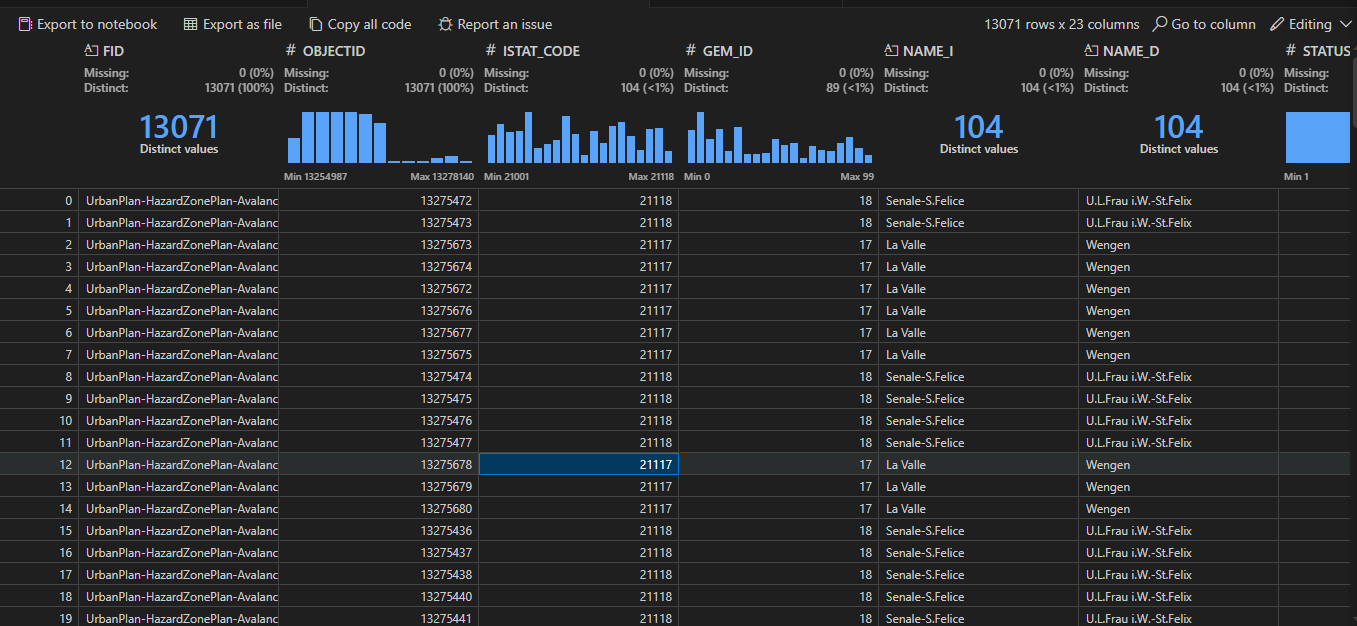

We can see that this table is considerably larger, having a larger number of columns and much larger of rows. We have some columns that suggest a possible join with the previous table (NAME_I, NAME_D, ISTAT_CODE) and others that contain completely new information. Some columns seem to be equivalent in diferent languages.

In [6]:
avalanches = pd.read_csv(filepath / 'UrbanPlan-HazardZonePlan-Avalanches.csv')
avalanches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13071 entries, 0 to 13070
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FID                13071 non-null  object 
 1   OBJECTID           13071 non-null  int64  
 2   ISTAT_CODE         13071 non-null  int64  
 3   GEM_ID             13071 non-null  int64  
 4   NAME_I             13071 non-null  object 
 5   NAME_D             13071 non-null  object 
 6   STATUS_GZP         13071 non-null  int64  
 7   DESC_I             13071 non-null  object 
 8   DESC_D             13071 non-null  object 
 9   CODE               13071 non-null  int64  
 10  PERICOLO           13071 non-null  object 
 11  GEFAHR             13071 non-null  object 
 12  ID_PROCESS         13071 non-null  object 
 13  PROCESSO           13071 non-null  object 
 14  PROZESS            13071 non-null  object 
 15  ID_GP              13071 non-null  object 
 16  ID_GS              130

Weirdly enough, there's a column that is fully empty (ID_PHEN).

Some of this information seems to be irrelevant for our application (we don't really need label coordinates or redundant danger classifications in different languages)

In [7]:
avalanches.nunique()

FID                  13071
OBJECTID             13071
ISTAT_CODE             104
GEM_ID                  89
NAME_I                 104
NAME_D                 104
STATUS_GZP               1
DESC_I                   1
DESC_D                   1
CODE                     4
PERICOLO                 4
GEFAHR                   4
ID_PROCESS               5
PROCESSO                 5
PROZESS                  5
ID_GP                   11
ID_GS                    3
ID_PHEN                  0
GRADODISTUDIO            2
BEARBEITUNGSTIEFE        2
X_LABEL              13039
Y_LABEL              13035
SHAPE                13050
dtype: int64

In combination with the count unique function that we saw before, we know we'll be able to discard a few of these columns;

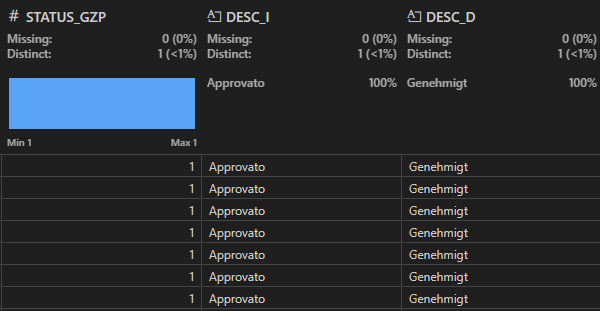

These three columns are completely redundant, as only approved studies have been included in the table and we won't model the approval process.

ID_PHEN is completely empty and can be discarded.

We can now check for functional dependencies.

In [8]:
result = check_all_nontrivial_fd(avalanches, threshold = 0.9)
print_nontrivial_fd(result)


=== RESULTS ===

Equivalence Classes:
{'NAME_D', 'NAME_I', 'ISTAT_CODE'}
{'CODE', 'PERICOLO', 'GEFAHR'}
{'PROCESSO', 'ID_PROCESS', 'PROZESS'}
{'ID_GS', 'BEARBEITUNGSTIEFE', 'GRADODISTUDIO'}

Minimal FDs:
  {'NAME_D', 'NAME_I', 'ISTAT_CODE'} → GEM_ID
  X_LABEL → ID_GP
  X_LABEL → {'PROCESSO', 'ID_PROCESS', 'PROZESS'}
  X_LABEL → {'CODE', 'PERICOLO', 'GEFAHR'}
  SHAPE → {'NAME_D', 'NAME_I', 'ISTAT_CODE'}
  SHAPE → {'ID_GS', 'BEARBEITUNGSTIEFE', 'GRADODISTUDIO'}
  SHAPE → Y_LABEL
  SHAPE → X_LABEL

Unique columns:
  OBJECTID
  FID


We can identify several classes that could be included in our ontology. Some of these FDs are a bit weird. Shape should probably be an unique column, and GEM_ID should probably be in an equivalence class with ISTAT_CODE.

We can write some code to evaluate these differences from our expectancy.

In [9]:
avalanches[["NAME_I","GEM_ID"]].drop_duplicates().sort_values("GEM_ID")[lambda df: df.duplicated(subset="GEM_ID", keep=False)]

,NAME_I,GEM_ID
6377,Trodena nel parco naturale,2
9284,Andriano,2
7703,Anterivo,3
9241,Tubre,3
2930,Appiano s.s.d.v.,4
459,Ultimo,4
9539,Avelengo,5
4316,Vadena,5
7631,Barbiano,7
271,Val di Vizze,7


If we investigate the relationship between GEM_ID and NAME_I, we can see that these two municipalities share a GEM_ID (which can be reasonably supposed to mean Gemeinde identification) but don't even share a border.

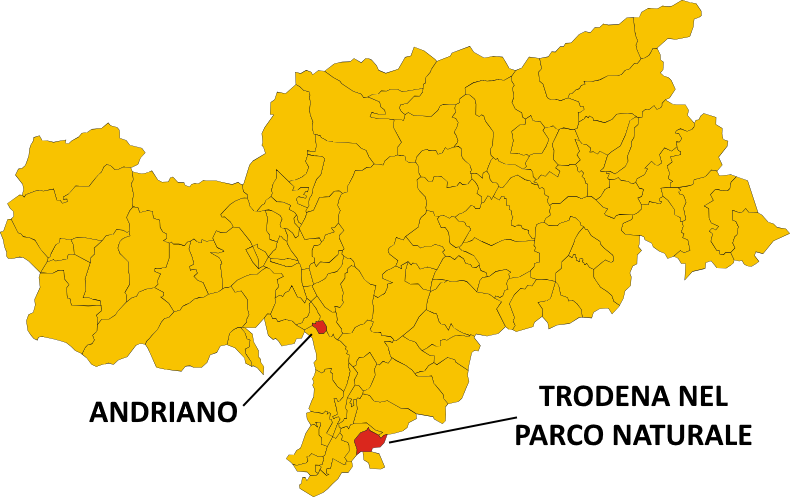

Since the Wikipedia page doesn't include such weird city limits, it's reasonable to suppose that the GEM_ID is simply wrong and should be ignored as it is redundant and less accurate than other columns.

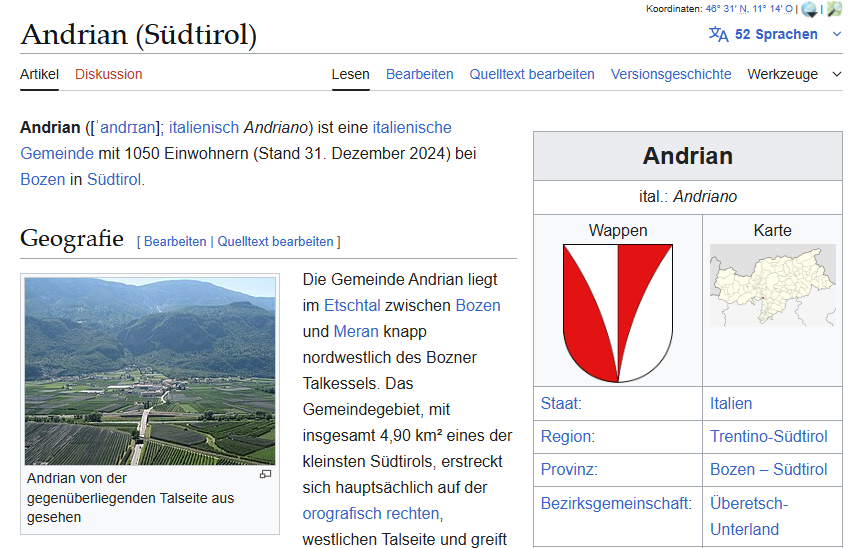

We also should investigate why aren't shapes unique, since the dataset strongly suggests that each row is a different area, with its susceptibility to avalanches.

In [10]:
# We already know that FID and OBJECTID are unique, so we don't need to check for uniqueness among them
repeated_avalanche_shapes = avalanches.drop(['FID', 'OBJECTID'], axis = 1)
repeated_avalanche_shapes = repeated_avalanche_shapes[repeated_avalanche_shapes.duplicated(subset='SHAPE', keep=False)]
# Now, this dataframe contains only repeated avalanche shapes without the unique FID and OBJECTID. Now let's find out if the rows are completely duplicated or not
repeated_avalanche_shapes.drop_duplicates(keep=False)


,ISTAT_CODE,GEM_ID,NAME_I,NAME_D,STATUS_GZP,DESC_I,DESC_D,CODE,PERICOLO,GEFAHR,...,PROCESSO,PROZESS,ID_GP,ID_GS,ID_PHEN,GRADODISTUDIO,BEARBEITUNGSTIEFE,X_LABEL,Y_LABEL,SHAPE
11086,21085,85,S.Cristina Valgardena,St.Christina in Gröden,1,Approvato,Genehmigt,1040303,Valanga - Livello pericolosità elevato (H3),Lawine - Hohe Gefahrenstufe (H3),...,Valanga,Lawine,n,b,NaN,Medio (BT10),Mittlere (BT10),708716.28,5161375.87,"POLYGON ((708699.521 5161335.3189, 708700.807 ..."
12025,21085,85,S.Cristina Valgardena,St.Christina in Gröden,1,Approvato,Genehmigt,1040304,Valanga - Livello pericolosità molto elevato (H4),Lawine - Sehr hohe Gefahrenstufe (H4),...,Valanga,Lawine,n,b,NaN,Medio (BT10),Mittlere (BT10),708716.28,5161375.87,"POLYGON ((708699.521 5161335.3189, 708700.807 ..."


The fact that out of dozens of thousands of rows only 21 have duplicated shapes and only one is imperfectly duplicated (as the only difference is the danger level) implies this is an error rather than a feature. When transforming this data for our database, we will ignore all shape duplicates, and in case of two different danger levels, we will use the row with the highest higher study level, and in case they're equal, the row with the highest danger level (as it would be wiser to be more cautious).

<br>

## Landslides
[_UrbanPlan-HazardZonePlan-Landslides.csv_](https://geonetwork1.civis.bz.it/geonetwork/srv/eng/catalog.search#/metadata/p_bz:TerritorialPlans:UrbanPlan-HazardZonePlan-Landslides)

The Landslides dataset is similar to the Avalanches dataset, in which each row contains an area with a danger and study level.

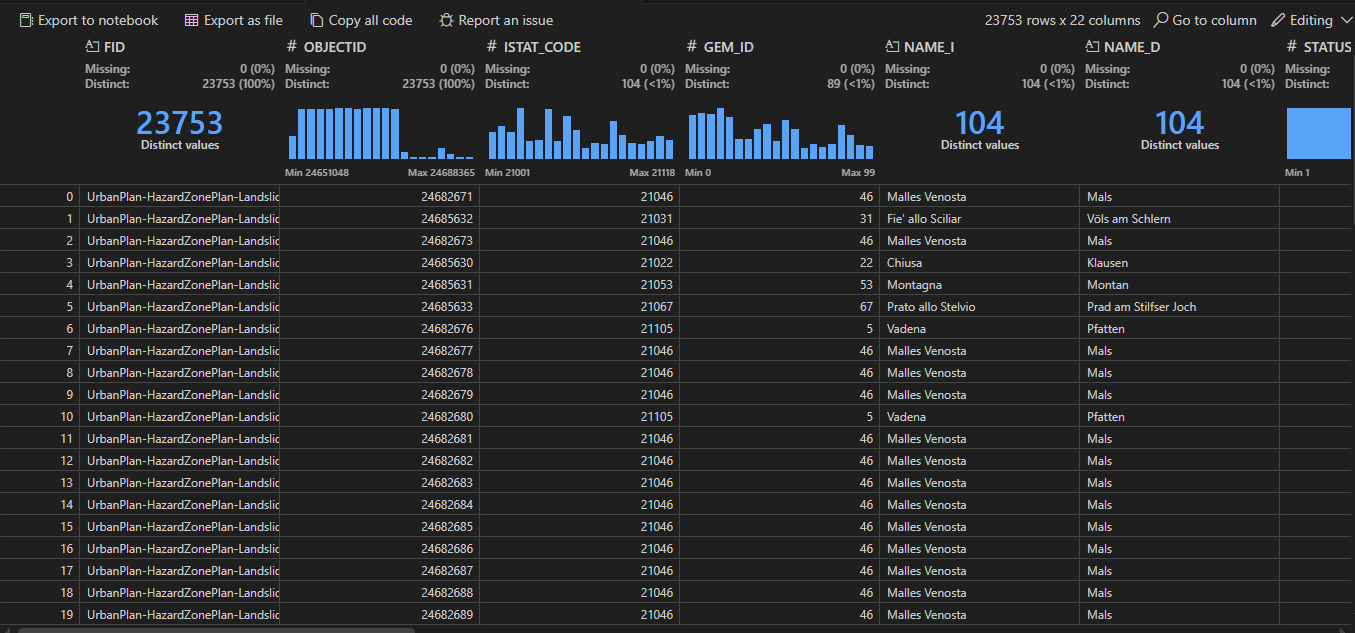

This dataset is even larger than the Avalanches dataset.

In [11]:
landslides = pd.read_csv(filepath / 'UrbanPlan-HazardZonePlan-Landslides.csv')
landslides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23753 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FID                23753 non-null  object 
 1   OBJECTID           23753 non-null  int64  
 2   ISTAT_CODE         23753 non-null  int64  
 3   GEM_ID             23753 non-null  int64  
 4   NAME_I             23753 non-null  object 
 5   NAME_D             23753 non-null  object 
 6   STATUS_GZP         23753 non-null  int64  
 7   DESC_I             23753 non-null  object 
 8   DESC_D             23753 non-null  object 
 9   CODE               23753 non-null  int64  
 10  PERICOLO           23753 non-null  object 
 11  GEFAHR             23753 non-null  object 
 12  ID_PROCESS         23753 non-null  object 
 13  PROCESSO           23745 non-null  object 
 14  PROZESS            23745 non-null  object 
 15  ID_GP              23753 non-null  object 
 16  ID_GS              237

Only a few columns have missing values; PROCESSO and PROZESS have missing values (although ID_PROCESS doesn't), GRADODISTUDIO and BEARBEITUNGSSTIEFE have one missing value each (although ID_GS doesn't).

Let's check for uniqueness.

In [12]:
landslides.nunique()

FID                  23753
OBJECTID             23753
ISTAT_CODE             104
GEM_ID                  89
NAME_I                 104
NAME_D                 104
STATUS_GZP               1
DESC_I                   1
DESC_D                   1
CODE                     4
PERICOLO                 4
GEFAHR                   4
ID_PROCESS               7
PROCESSO                 5
PROZESS                  5
ID_GP                   11
ID_GS                    3
GRADODISTUDIO            2
BEARBEITUNGSTIEFE        2
X_LABEL              23591
Y_LABEL              23591
SHAPE                23640
dtype: int64

We seem to be in a very similar situation as before as we see SHAPE with a number of unique values slightly smaller than the row count and all the columns are familiar, only missing ID_PHEN, that was an empty column in the Avalanches dataset.

_Also, it is interesting to note that there are only 104 municipalities while there are 116 in the municipalities dataset, in both datasets. Maybe those are the flattest municipalities in South Tyrol? Further inquiry will be done._

In [13]:
result = check_all_nontrivial_fd(landslides, threshold=0.9)
print_nontrivial_fd(result)


=== RESULTS ===

Equivalence Classes:
{'NAME_D', 'NAME_I', 'ISTAT_CODE'}
{'CODE', 'PERICOLO', 'GEFAHR'}
{'PROCESSO', 'PROZESS'}
{'ID_GS', 'BEARBEITUNGSTIEFE', 'GRADODISTUDIO'}

Minimal FDs:
  {'NAME_D', 'NAME_I', 'ISTAT_CODE'} → GEM_ID
  {'PROCESSO', 'PROZESS'} → ID_PROCESS
  SHAPE → {'NAME_D', 'NAME_I', 'ISTAT_CODE'}
  SHAPE → {'ID_GS', 'BEARBEITUNGSTIEFE', 'GRADODISTUDIO'}
  SHAPE → Y_LABEL
  SHAPE → X_LABEL

Unique columns:
  OBJECTID
  FID


We can repeat the process done for the avalanches dataset now, to investigate the repeated shape values.

In [14]:
repeated_landslide_shapes = landslides.drop(['FID', 'OBJECTID'], axis = 1)
repeated_landslide_shapes = repeated_landslide_shapes[repeated_landslide_shapes.duplicated(subset='SHAPE', keep=False)]
# Now, this dataframe contains only repeated avalanche shapes without the unique FID and OBJECTID. Let's find out if the rows are completely duplicated or not
repeated_landslide_shapes = repeated_landslide_shapes.drop_duplicates(keep=False).sort_values("SHAPE")
repeated_landslide_shapes

,ISTAT_CODE,GEM_ID,NAME_I,NAME_D,STATUS_GZP,DESC_I,DESC_D,CODE,PERICOLO,GEFAHR,ID_PROCESS,PROCESSO,PROZESS,ID_GP,ID_GS,GRADODISTUDIO,BEARBEITUNGSTIEFE,X_LABEL,Y_LABEL,SHAPE
1304,21018,18,Castelbello-Ciardes,Kastelbell-Tschars,1,Approvato,Genehmigt,1040104,Frana - Livello pericolosità molto elevato (H4),Massenbewegung - Sehr hohe Gefahrenstufe (H4),LF,Crollo,Sturz,9,b,Medio (BT10),Mittlere (BT10),644369.63,5165136.94,"POLYGON ((644511.095 5165207.9543, 644514.3639..."
15965,21018,18,Castelbello-Ciardes,Kastelbell-Tschars,1,Approvato,Genehmigt,1040103,Frana - Livello pericolosità elevato (H3),Massenbewegung - Hohe Gefahrenstufe (H3),LD,Colata di versante,Hangmure,5,b,Medio (BT10),Mittlere (BT10),644369.63,5165136.94,"POLYGON ((644511.095 5165207.9543, 644514.3639..."
16346,21018,18,Castelbello-Ciardes,Kastelbell-Tschars,1,Approvato,Genehmigt,1040103,Frana - Livello pericolosità elevato (H3),Massenbewegung - Hohe Gefahrenstufe (H3),LD,Colata di versante,Hangmure,4,b,Medio (BT10),Mittlere (BT10),644580.68,5165275.96,"POLYGON ((644611.2034 5165308.5277, 644604.088..."
1439,21018,18,Castelbello-Ciardes,Kastelbell-Tschars,1,Approvato,Genehmigt,1040104,Frana - Livello pericolosità molto elevato (H4),Massenbewegung - Sehr hohe Gefahrenstufe (H4),LF,Crollo,Sturz,9,b,Medio (BT10),Mittlere (BT10),644580.68,5165275.96,"POLYGON ((644611.2034 5165308.5277, 644604.088..."
15465,21041,41,Lana,Lana,1,Approvato,Genehmigt,1040102,Frana - Livello pericolosità medio (H2),Massenbewegung - Mittlere Gefahrenstufe (H2),LF,Crollo,Sturz,4,a,Elevato (BT05),Hoch (BT05),664251.85,5163875.08,"POLYGON ((664267.745 5163797.4489, 664268.294 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20375,21082,82,S.Martino in Badia,St.Martin in Thurn,1,Approvato,Genehmigt,1040103,Frana - Livello pericolosità elevato (H3),Massenbewegung - Hohe Gefahrenstufe (H3),LF,Crollo,Sturz,6,b,Medio (BT10),Mittlere (BT10),722020.55,5174131.82,"POLYGON ((721973.494 5174074.5429, 721979.828 ..."
12653,21063,63,Perca,Percha,1,Approvato,Genehmigt,1040102,Frana - Livello pericolosità medio (H2),Massenbewegung - Mittlere Gefahrenstufe (H2),LF,Crollo,Sturz,2,a,Elevato (BT05),Hoch (BT05),728609.95,5186114.70,"POLYGON ((728606.4977 5186086.5154, 728607.073..."
12649,21063,63,Perca,Percha,1,Approvato,Genehmigt,1040102,Frana - Livello pericolosità medio (H2),Massenbewegung - Mittlere Gefahrenstufe (H2),LG,Scivolamento,Rutschung,1,a,Elevato (BT05),Hoch (BT05),728609.95,5186114.70,"POLYGON ((728606.4977 5186086.5154, 728607.073..."
17846,21063,63,Perca,Percha,1,Approvato,Genehmigt,1040103,Frana - Livello pericolosità elevato (H3),Massenbewegung - Hohe Gefahrenstufe (H3),LF,Crollo,Sturz,6,a,Elevato (BT05),Hoch (BT05),729755.90,5186001.55,"POLYGON ((729768.0442 5186006.5353, 729766.868..."


In [15]:
# Find varying columns and display results in one go
varying_cols = [col for col in repeated_landslide_shapes.columns 
                if col != 'SHAPE' and repeated_landslide_shapes.groupby('SHAPE')[col].nunique().max() > 1]

repeated_landslide_shapes_relevant_columns = repeated_landslide_shapes[['SHAPE'] + varying_cols].sort_values('PROCESSO').sort_values('SHAPE')
repeated_landslide_shapes_relevant_columns.groupby('SHAPE').nunique().mean()

CODE                 1.423913
PERICOLO             1.423913
GEFAHR               1.423913
ID_PROCESS           2.000000
PROCESSO             2.000000
PROZESS              2.000000
ID_GP                1.956522
ID_GS                1.010870
GRADODISTUDIO        1.010870
BEARBEITUNGSTIEFE    1.010870
dtype: float64

We can see here that, differently from the previous dataset, we observe different dangers sharing the same area; ID_PROCESS, PROCESSO and PROZESS are always different among the repeated shapes.

In [16]:
landslides[["PROCESSO", "PROZESS", "ID_PROCESS"]].value_counts()

PROCESSO            PROZESS         ID_PROCESS
Crollo              Sturz           LF            11993
Frana               Massenbewegung  LX             8802
Scivolamento        Rutschung       LG             2502
Colata di versante  Hangmure        LD              441
Sprofondamento      Einbruch        LC                7
Name: count, dtype: int64

Sometimes one area will have more than one process (which is a type of danger - in English).
- Crollo = Rockfall / Rock collapse
- Frana = Landslide / Slope failure
- Scivolamento = Sliding / Slip
- Colata di Versante = Debris flow / Slope flow
- Sprofondamento = Subsidence / Sinking / Collapse

Below, you can see that the process is always unique for the avalanche dataset. However, since they're so similar, we should model them both the same way in the database and define each object represented in each row as a SHAPE-PROCESS (area) combination.

In [17]:
unique_avalanches_count = avalanches[avalanches.duplicated(subset="SHAPE", keep=False)].groupby("SHAPE").nunique().mean()
pd.concat([unique_avalanches_count[unique_avalanches_count > 1], unique_avalanches_count[[ "ID_PROCESS", "PROCESSO", "PROZESS"]]])

FID           2.000000
OBJECTID      2.000000
CODE          1.047619
PERICOLO      1.047619
GEFAHR        1.047619
ID_PROCESS    1.000000
PROCESSO      1.000000
PROZESS       1.000000
dtype: float64

In [18]:
# Just putting some garbage out
del repeated_avalanche_shapes
del repeated_landslide_shapes
del repeated_landslide_shapes_relevant_columns
del result
del unique_avalanches_count
del varying_cols

NameError: name 'avalanches_without_ids' is not defined


<br>

## Driveable Road Segments
[_sudagoost_tran_rds_ln_s4_osm_pp_drive.csv_](https://edp-portal.eurac.edu/discovery/c389eb97-87c0-4948-8b6d-cfc44a4263b5)

This dataset consists of many road segments and has similar cardinality to the landslides dataset.

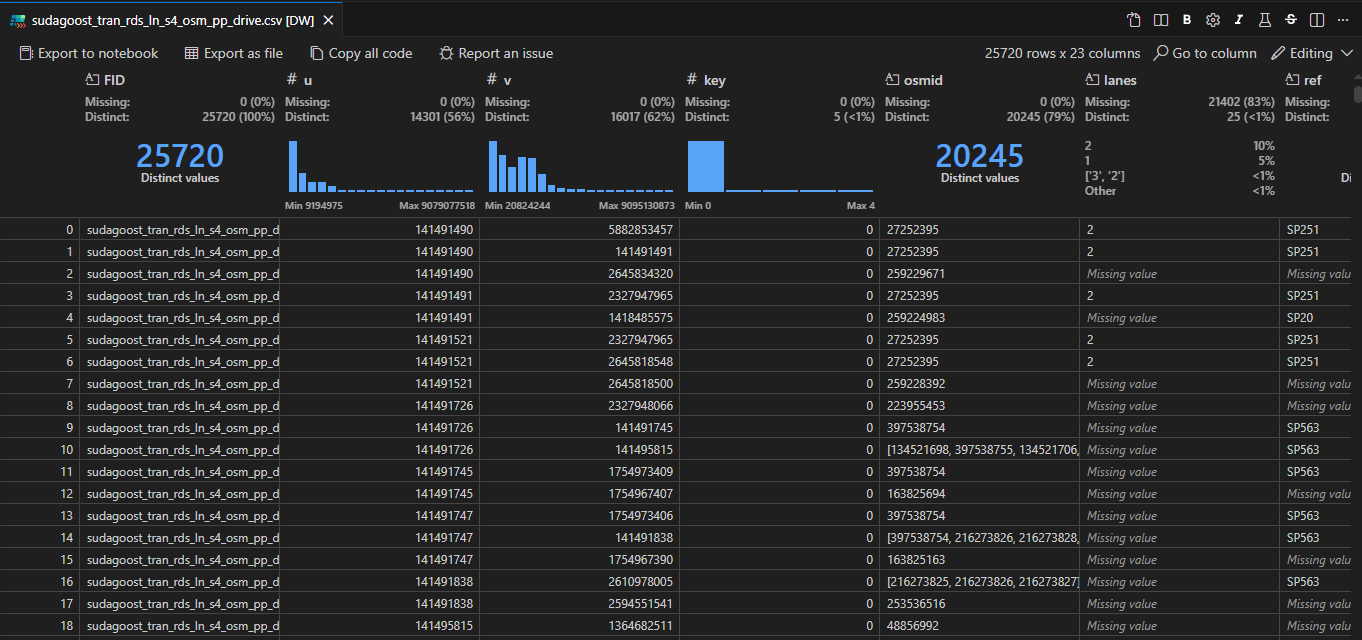

By using the Data Wrangler, one can easily see that this dataset contains several very sparse columns.

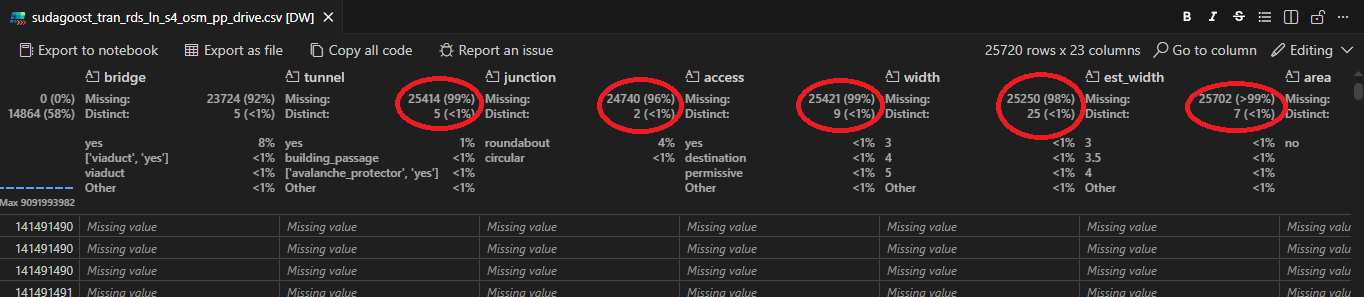

Let's repeat the processes we did for the other datasets.

In [34]:
roads = pd.read_csv(filepath / 'sudagoost_tran_rds_ln_s4_osm_pp_drive.csv')
roads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25720 entries, 0 to 25719
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FID        25720 non-null  object 
 1   u          25720 non-null  int64  
 2   v          25720 non-null  int64  
 3   key        25720 non-null  int64  
 4   osmid      25720 non-null  object 
 5   lanes      4318 non-null   object 
 6   ref        5967 non-null   object 
 7   name       18970 non-null  object 
 8   highway    25720 non-null  object 
 9   maxspeed   5831 non-null   object 
 10  oneway     25720 non-null  int64  
 11  length     25720 non-null  float64
 12  from       25720 non-null  int64  
 13  to         25720 non-null  int64  
 14  bridge     1996 non-null   object 
 15  tunnel     306 non-null    object 
 16  junction   980 non-null    object 
 17  access     299 non-null    object 
 18  width      470 non-null    object 
 19  est_width  18 non-null     object 
 20  area  

Some of these columns seem to be completely useless. Area, service and est_width are so sparse that are not worth considering in our database. Other of these columns seem to only be a very inefficient way of storing sparse information (for example, "bridge" clearly has empty values to represent regular non-bridge roads).

In [ ]:
roads["bridge"].value_counts(dropna=False)

bridge
NaN                   23724
yes                    1983
['viaduct', 'yes']        7
viaduct                   3
covered                   2
garage                    1
Name: count, dtype: int64

Maxspeed is barely useful.

In [ ]:
roads["maxspeed"].value_counts(dropna=False)

maxspeed
NaN                         19889
50                           1900
30                           1835
40                            664
90                            359
                            ...  
['50', '70', '30']              1
['90', '50', '40']              1
['60', '110', '80']             1
['90', '50', '80']              1
['90', '50', '40', '60']        1
Name: count, Length: 68, dtype: int64

Due to their similarities and due to the semantic of the column names, we suspect that "u" is equal to "to", that "v" is equal to "from" and that {from, v} is either always or almost always included somewhere in the columns {to, u} (and vice-versa)

In [ ]:
roads[['u','to','from','v']]

,u,to,from,v
0,141491490,141491490,5882853457,5882853457
1,141491490,141491490,141491491,141491491
2,141491490,141491490,2645834320,2645834320
3,141491491,141491491,2327947965,2327947965
4,141491491,141491491,1418485575,1418485575
...,...,...,...,...
25715,7384729395,7384729395,8631650389,8631650389
25716,7526507007,7526507007,7526507012,7526507012
25717,8631650373,8631650389,8631650373,8631650389
25718,8631650373,8631650373,8631650388,8631650388


In [ ]:
pd.Series({
    'u == to': (roads['u'] == roads['to']).mean() * 100,
    'v == to': (roads['v'] == roads['to']).mean() * 100, 
    'u == from': (roads['u'] == roads['from']).mean() * 100,
    'v == from': (roads['v'] == roads['from']).mean() * 100,
    'u != to': (roads['u'] != roads['to']).mean() * 100,
    'v != to': (roads['v'] != roads['to']).mean() * 100, 
    'u != from': (roads['u'] != roads['from']).mean() * 100,
    'v != from': (roads['v'] != roads['from']).mean() * 100
}, name='Percentage Match')

u == to      92.908243
v == to       7.270607
u == from     7.270607
v == from    92.908243
u != to       7.091757
v != to      92.729393
u != from    92.729393
v != from     7.091757
Name: Percentage Match, dtype: float64

In [ ]:
pd.Series({
    'u == v': (roads['u'] == roads['v']).mean() * 100,
    'from == to': (roads['from'] == roads['to']).mean() * 100
}, name='Percentage Match')

u == v        0.178849
from == to    0.178849
Name: Percentage Match, dtype: float64

'osmid' appears to refer to OpenStreetMap ID. Testing some of those values takes us to valid road segments in the OpenStreetMap website.

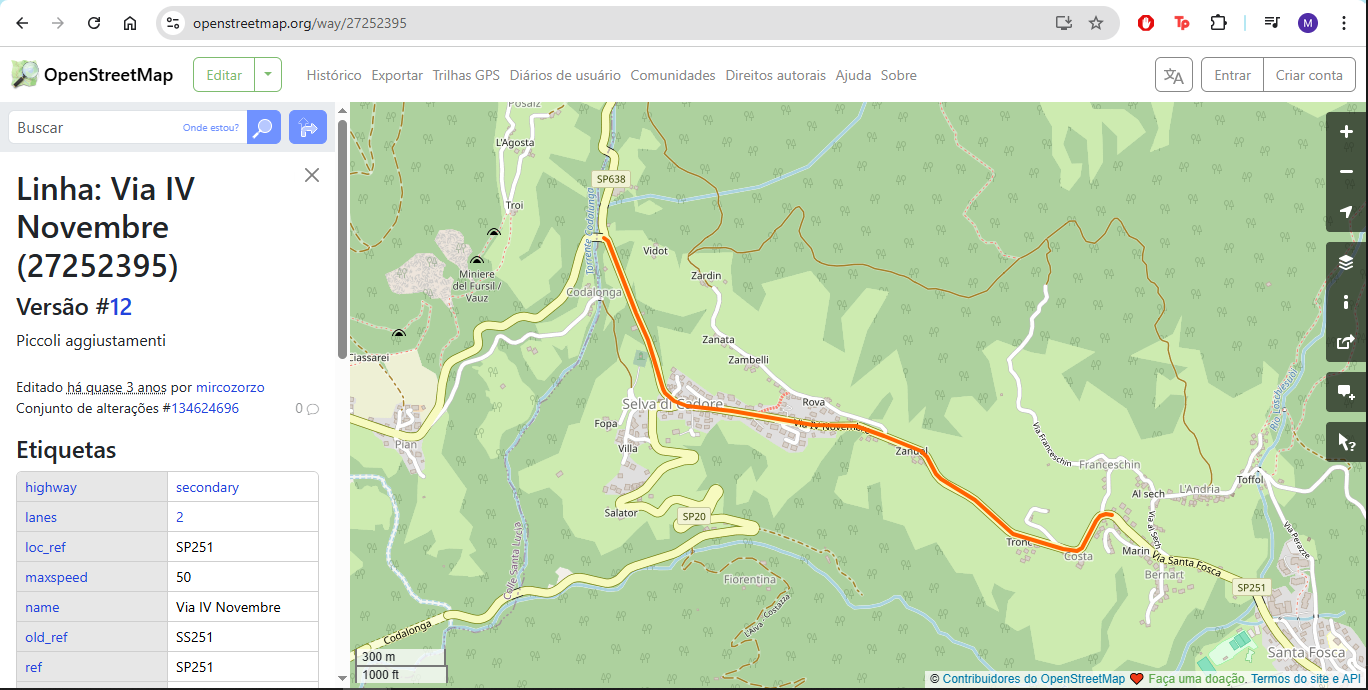

Some of the values in the 'osmid' are not tidy; that is, they have several values in a single cell. But each of those is valid.

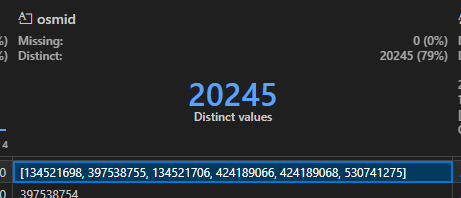

A bigger problem is that osmids are not unique. We will investigate what is the reason behind that.

In [ ]:
duplicated_osmids = roads[roads.duplicated(subset="osmid",keep=False)].sort_values('osmid')

varying_cols = []
for col in duplicated_osmids.columns:
    if duplicated_osmids.groupby('osmid')[col].nunique().max() > 1:
        varying_cols.append(col)
        
duplicated_osmids[['osmid'] + varying_cols].sort_values('osmid')

,osmid,FID,u,v,key,length,from,to,geom
5182,100393725,sudagoost_tran_rds_ln_s4_osm_pp_drive.5165,1160393590,3168494294,0,76.693,3168494294,1160393590,"MULTILINESTRING ((12.1042049 46.7572415, 12.10..."
5181,100393725,sudagoost_tran_rds_ln_s4_osm_pp_drive.5164,1160393590,3168494289,0,107.779,3168494289,1160393590,"MULTILINESTRING ((12.1027191 46.7559414, 12.10..."
4812,100393778,sudagoost_tran_rds_ln_s4_osm_pp_drive.4793,892734536,1160393274,0,88.428,1160393274,892734536,"MULTILINESTRING ((12.1127108 46.7688938, 12.11..."
4077,100393778,sudagoost_tran_rds_ln_s4_osm_pp_drive.4811,892734624,1160393274,0,44.342,1160393274,892734624,"MULTILINESTRING ((12.1127108 46.7688938, 12.11..."
5170,100393793,sudagoost_tran_rds_ln_s4_osm_pp_drive.5153,1160392827,1852432671,0,10.612,1160392827,1852432671,"MULTILINESTRING ((12.10219 46.7586628, 12.1022..."
...,...,...,...,...,...,...,...,...,...
19623,99863067,sudagoost_tran_rds_ln_s4_osm_pp_drive.19604,1134411556,1134411900,0,14.755,1134411900,1134411556,"MULTILINESTRING ((11.6271048 46.8432477, 11.62..."
19298,99863068,sudagoost_tran_rds_ln_s4_osm_pp_drive.19281,807733932,1010656620,0,87.137,1010656620,807733932,"MULTILINESTRING ((11.655867 46.8179453, 11.656..."
19570,99863068,sudagoost_tran_rds_ln_s4_osm_pp_drive.19551,1010656620,1010658508,0,223.399,1010658508,1010656620,"MULTILINESTRING ((11.6529385 46.8179383, 11.65..."
25679,99923766,sudagoost_tran_rds_ln_s4_osm_pp_drive.25679,6353019828,6353019833,0,4.859,6353019833,6353019828,"MULTILINESTRING ((10.9648325 46.6431042, 10.96..."


In [ ]:
duplicated_osmids[['osmid'] + varying_cols].groupby('osmid').nunique().mean()

FID       2.634816
u         2.247835
v         2.028964
key       1.014333
length    2.634518
from      2.104807
to        2.296506
geom      2.634816
dtype: float64

We can be sure that osmid cannot be used as a primary key here, as often a single OSM way can be split into multiple segments for our original table.

Let's check for functional dependencies.

In [35]:
result = check_all_nontrivial_fd(roads.drop(['lanes', 'maxspeed', 'junction', 'access', 'width', 'est_width', 'area', 'service'], axis = 1), threshold=0.99)
print_nontrivial_fd(result)


=== RESULTS ===

Equivalence Classes:

Minimal FDs:
  osmid → highway
  osmid → oneway
  geom → from
  geom → v
  geom → u
  geom → length
  geom → name
  geom → oneway
  geom → to

Unique columns:
  FID


In [55]:
pd.concat(
    [
        roads[['osmid', 'name']].groupby('osmid').nunique().max(),
        roads[['osmid', 'name']].groupby('osmid').nunique().min()
    ],
    axis=1
).rename(
    {
        0: 'max', 
        1: 'min'
    },
    axis = 1
).rename(
    {
        'name': 'Different names for the same osmid'
    },
    axis = 0
)

,max,min
Different names for the same osmid,1,0


In [43]:
result = check_all_nontrivial_fd(roads[['osmid', 'name']], threshold=0.70)
print_nontrivial_fd(result)


=== RESULTS ===

Equivalence Classes:

Minimal FDs:
  osmid → name

Unique columns:


While name doesn't really have a proper functional dependency on osmid, it could be represented that way.

In [61]:
pd.concat(
    [
        roads.groupby('osmid').nunique().max(),
        roads.groupby('osmid').nunique().min(),
        roads.groupby('osmid').nunique().mean()
    ],
    axis=1
).sort_values(2, ascending = False)[lambda df: df[0] == 1]

,0,1,2
oneway,1,1,1.000000
highway,1,1,1.000000
name,1,0,0.720721
maxspeed,1,0,0.229983
ref,1,0,0.226525
lanes,1,0,0.173574
bridge,1,0,0.098592
junction,1,0,0.031959
width,1,0,0.019313
tunnel,1,0,0.014967


## Some final checks

Let's check for some inclusion dependencies now

In [19]:
def find_inclusion_dependencies(df1, col1, df2, col2, threshold=0.95):
    """Check if df1[col1] ⊆ df2[col2]"""
    values1 = set(df1[col1].dropna())
    values2 = set(df2[col2].dropna())
    
    intersection = values1.intersection(values2)
    inclusion_ratio = len(intersection) / len(values1) if values1 else 0
    
    return inclusion_ratio >= threshold

# Check key relationships
municipalities_codes = set(municipalities['ISTAT_CODE'])
avalanches_codes = set(avalanches['ISTAT_CODE']) 
landslides_codes = set(landslides['ISTAT_CODE'])

print(f"Avalanches codes ⊆ Municipalities: {avalanches_codes.issubset(municipalities_codes)}")
print(f"Landslides codes ⊆ Municipalities: {landslides_codes.issubset(municipalities_codes)}")

Avalanches codes ⊆ Municipalities: True
Landslides codes ⊆ Municipalities: True


In [28]:
pd.concat([avalanches.drop("ID_PHEN", axis=1), landslides]).nunique()

FID                  36824
OBJECTID             36824
ISTAT_CODE             104
GEM_ID                  89
NAME_I                 104
NAME_D                 104
STATUS_GZP               1
DESC_I                   1
DESC_D                   1
CODE                     8
PERICOLO                 8
GEFAHR                   8
ID_PROCESS              11
PROCESSO                 9
PROZESS                  9
ID_GP                   11
ID_GS                    4
GRADODISTUDIO            2
BEARBEITUNGSTIEFE        2
X_LABEL              32093
Y_LABEL              32075
SHAPE                32266
dtype: int64

We can also be reasonably certain that FID and OBJECTID are not repeated among avalanches and landslides.